<a href="https://www.kaggle.com/code/mosesmoncy/wind-speed-prediction?scriptVersionId=126869029" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

High precision and reliable wind speed forecasting is a challenge for meteorologists. Severe wind due to convective storms, causes considerable damages (large scale forest damage, outage, buildings/houses damage, etc.). Convective events such as thunderstorms, tornadoes as well as large hail, strong winds, are natural hazards that have the potential to disrupt daily life, especially over complex terrain favoring the initiation of convection. Even ordinary convective events produce severe winds which causes fatal and costly damages. Therefore, wind speed prediction is an important task to get advanced severe weather warning. This dataset contains the responses of a weather sensor that collected different weather variables such as temperatures and precipitation.

Model is created using LinearRegression and DecisionTreeRegressor

DATE (YYYY-MM-DD)
WIND: Average wind speed (knots)
IND: First indicator value
RAIN: Precipitation Amount (mm)
IND.1: Second indicator value
T.MAX: Maximum Temperature (°C)
IND.2: Third indicator value
T.MIN: Minimum Temperature (°C)
T.MIN.G: 09utc Grass Minimum Temperature (°C)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error



In [2]:
a=pd.read_csv('/kaggle/input/wind-dataset/wind_dataset.csv')
a

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5
...,...,...,...,...,...,...,...,...,...
6569,1978-12-27,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0
6570,1978-12-28,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0
6571,1978-12-29,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2
6572,1978-12-30,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5


In [3]:
# read first five data
a.head()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
0,1961-01-01,13.67,0,0.2,0.0,9.5,0.0,3.7,-1.0
1,1961-01-02,11.50,0,5.1,0.0,7.2,0.0,4.2,1.1
2,1961-01-03,11.25,0,0.4,0.0,5.5,0.0,0.5,-0.5
3,1961-01-04,8.63,0,0.2,0.0,5.6,0.0,0.4,-3.2
4,1961-01-05,11.92,0,10.4,0.0,7.2,1.0,-1.5,-7.5


In [4]:
# read last five data
a.tail()

,DATE,WIND,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G
6569,1978-12-27,14.46,0,16.8,0.0,9.8,0.0,4.0,0.0
6570,1978-12-28,14.33,0,16.0,0.0,9.1,0.0,8.5,8.0
6571,1978-12-29,19.17,0,14.7,0.0,5.0,0.0,3.5,3.2
6572,1978-12-30,18.08,0,4.9,0.0,2.9,0.0,0.3,-0.5
6573,1978-12-31,19.25,0,0.5,0.0,1.2,1.0,-1.5,-3.0


In [5]:
a.describe

<bound method NDFrame.describe of             DATE   WIND  IND  RAIN  IND.1  T.MAX  IND.2  T.MIN  T.MIN.G
0     1961-01-01  13.67    0   0.2    0.0    9.5    0.0    3.7     -1.0
1     1961-01-02  11.50    0   5.1    0.0    7.2    0.0    4.2      1.1
2     1961-01-03  11.25    0   0.4    0.0    5.5    0.0    0.5     -0.5
3     1961-01-04   8.63    0   0.2    0.0    5.6    0.0    0.4     -3.2
4     1961-01-05  11.92    0  10.4    0.0    7.2    1.0   -1.5     -7.5
...          ...    ...  ...   ...    ...    ...    ...    ...      ...
6569  1978-12-27  14.46    0  16.8    0.0    9.8    0.0    4.0      0.0
6570  1978-12-28  14.33    0  16.0    0.0    9.1    0.0    8.5      8.0
6571  1978-12-29  19.17    0  14.7    0.0    5.0    0.0    3.5      3.2
6572  1978-12-30  18.08    0   4.9    0.0    2.9    0.0    0.3     -0.5
6573  1978-12-31  19.25    0   0.5    0.0    1.2    1.0   -1.5     -3.0

[6574 rows x 9 columns]>

In [6]:
a.isna().sum()

DATE         0
WIND         0
IND          0
RAIN         0
IND.1       61
T.MAX      621
IND.2       61
T.MIN      674
T.MIN.G    360
dtype: int64

In [7]:
# taking count of IND.1
a['IND.1'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
6569    0.0
6570    0.0
6571    0.0
6572    0.0
6573    0.0
Name: IND.1, Length: 6574, dtype: float64>

In [8]:
# taking count of T.MAX
a['T.MAX'].value_counts

<bound method IndexOpsMixin.value_counts of 0       9.5
1       7.2
2       5.5
3       5.6
4       7.2
       ... 
6569    9.8
6570    9.1
6571    5.0
6572    2.9
6573    1.2
Name: T.MAX, Length: 6574, dtype: float64>

In [9]:
# taking count of IND.2
a['IND.2'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
6569    0.0
6570    0.0
6571    0.0
6572    0.0
6573    1.0
Name: IND.2, Length: 6574, dtype: float64>

In [10]:
# taking count of T.MIN
a['T.MIN'].value_counts

<bound method IndexOpsMixin.value_counts of 0       3.7
1       4.2
2       0.5
3       0.4
4      -1.5
       ... 
6569    4.0
6570    8.5
6571    3.5
6572    0.3
6573   -1.5
Name: T.MIN, Length: 6574, dtype: float64>

In [11]:
# taking count of T.MIN.G
a['T.MIN.G'].value_counts

<bound method IndexOpsMixin.value_counts of 0      -1.0
1       1.1
2      -0.5
3      -3.2
4      -7.5
       ... 
6569    0.0
6570    8.0
6571    3.2
6572   -0.5
6573   -3.0
Name: T.MIN.G, Length: 6574, dtype: float64>

In [12]:
a.columns

Index(['DATE', 'WIND', 'IND', 'RAIN', 'IND.1', 'T.MAX', 'IND.2', 'T.MIN',
       'T.MIN.G'],
      dtype='object')

In [13]:
# replacing missing values for the above columns with mean()

a['IND.1']=a['IND.1'].fillna(a['IND.1'].mean())
a['T.MAX']=a['T.MAX'].fillna(a['T.MAX'].mean())
a['IND.2']=a['IND.2'].fillna(a['IND.2'].mean())
a['T.MIN']=a['T.MIN'].fillna(a['T.MIN'].mean())
a['T.MIN.G']=a['T.MIN.G'].fillna(a['T.MIN.G'].mean())


In [14]:
a.isna().sum()

DATE       0
WIND       0
IND        0
RAIN       0
IND.1      0
T.MAX      0
IND.2      0
T.MIN      0
T.MIN.G    0
dtype: int64

In [15]:
a['DATE'] =pd.to_datetime(a['DATE'])

In [16]:
a["Year"] = a['DATE'].dt.year
a["month"] = a['DATE'].dt.month
a["day"] = a['DATE'].dt.day

Is "Month" Has a relation with "Wind"??

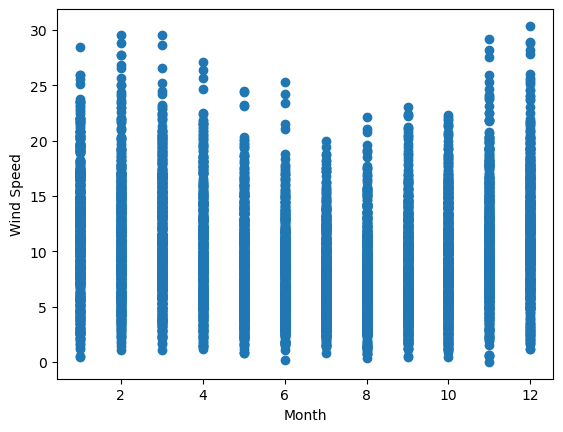

In [17]:
month = a["month"]
wind  = a['WIND']
plt.xlabel('Month')
plt.ylabel('Wind Speed')
plt.scatter(month , wind)
plt.show()

form this Scatter we found that: in (2,3,11,12) months the wind speed is high. , then we can estimate that it has a relation.

<AxesSubplot:>

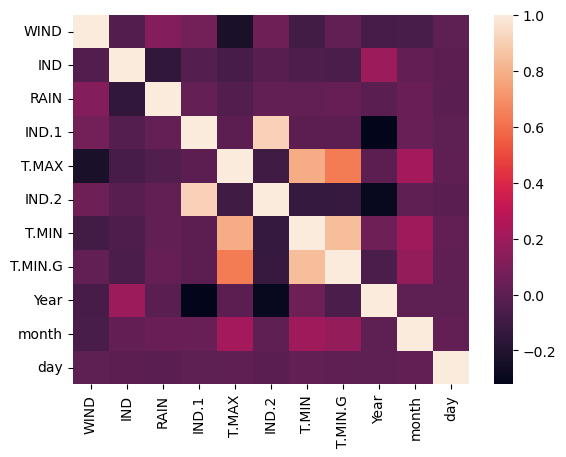

In [18]:
sns.heatmap(a.corr())

is tempreture has a relation with wind speed ?

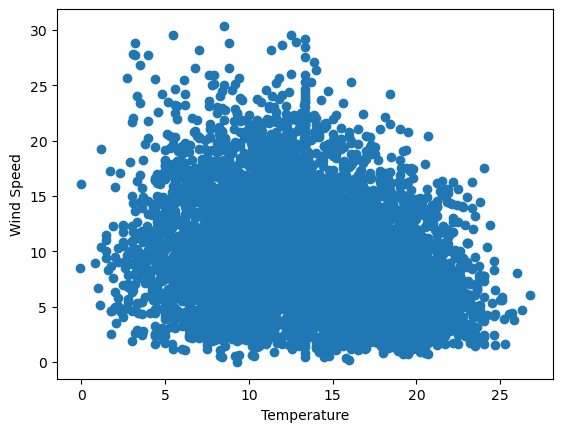

In [19]:
temperature = a["T.MAX"]
wind  = a['WIND']
plt.xlabel('Temperature')
plt.ylabel('Wind Speed')
plt.scatter(temperature , wind)
plt.show()

From the above scatter sketch, it seems it dosent have any relation with the "WIND"

Relation with all the columns with "WIND"

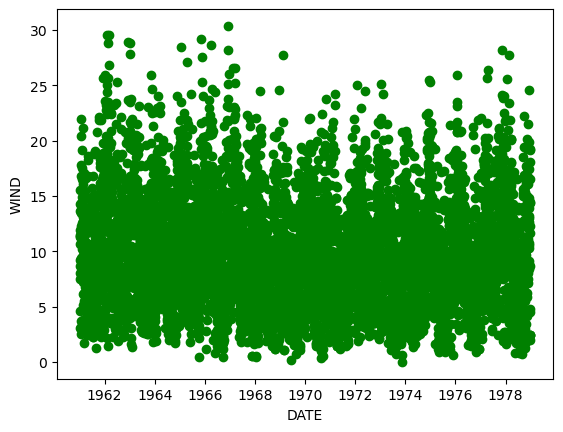

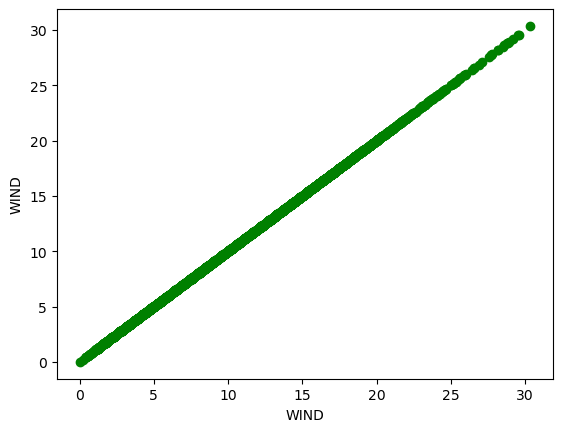

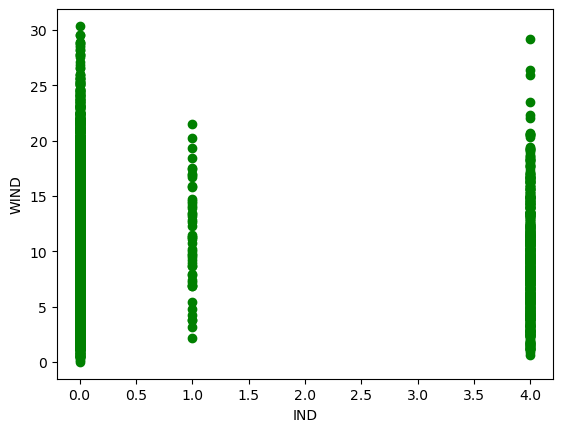

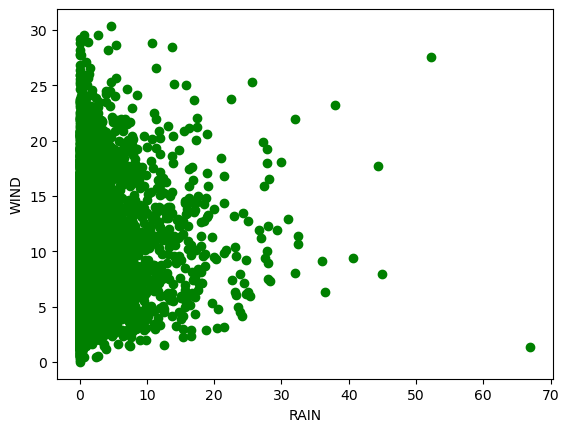

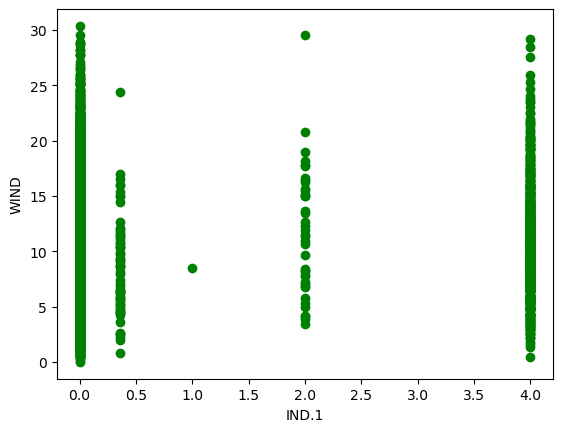

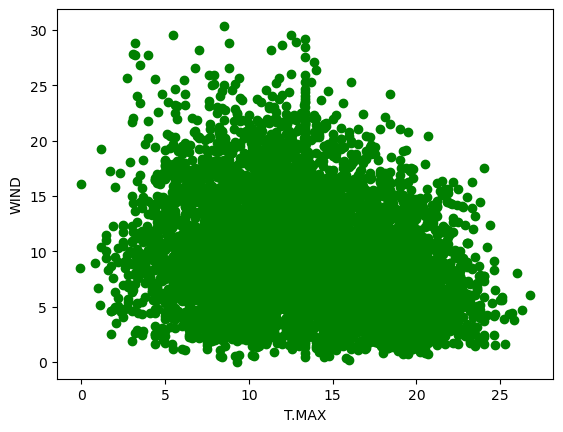

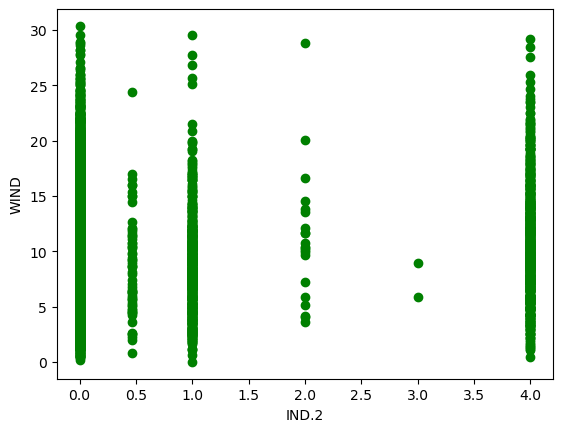

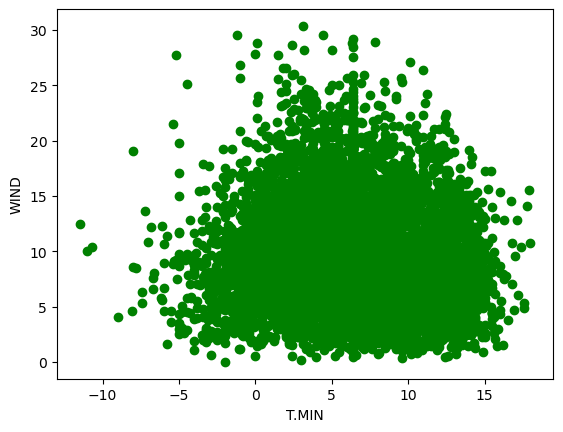

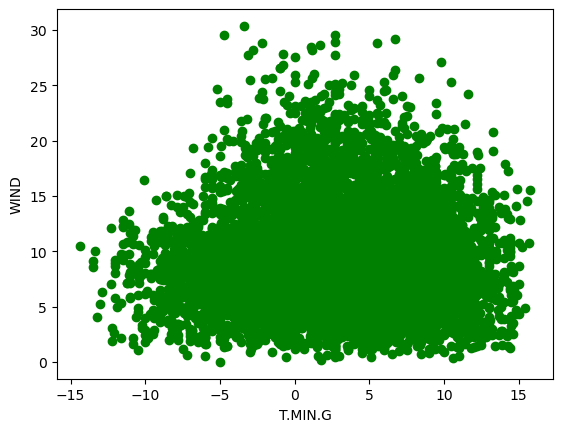

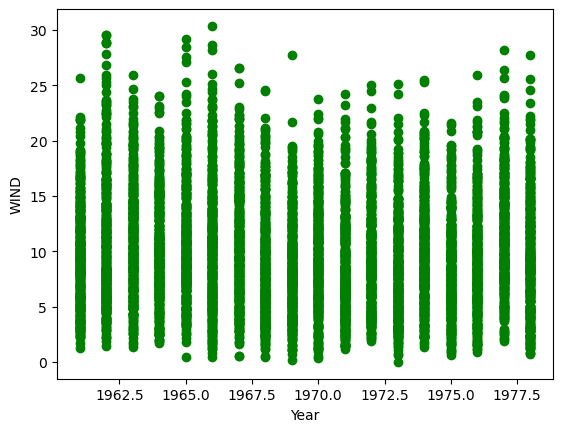

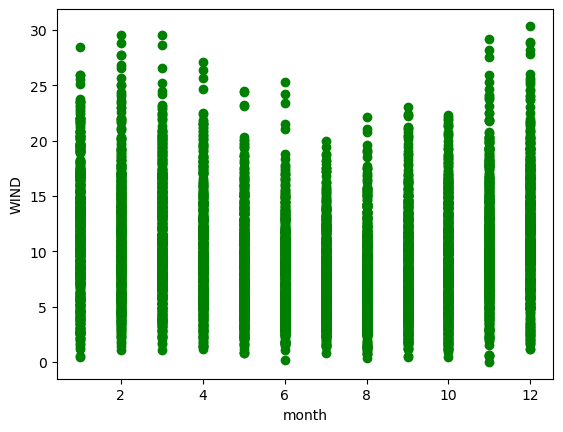

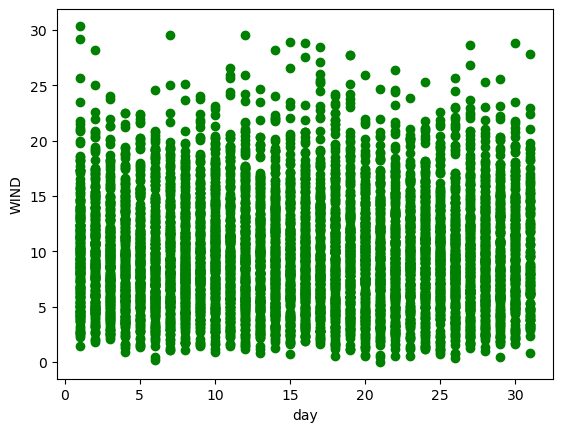

In [20]:
for i in a.columns:
    plt.xlabel(i)
    plt.ylabel("WIND")
    plt.scatter(a[i],a["WIND"],color='green')
    plt.show()

In [21]:
a.dtypes

DATE       datetime64[ns]
WIND              float64
IND                 int64
RAIN              float64
IND.1             float64
T.MAX             float64
IND.2             float64
T.MIN             float64
T.MIN.G           float64
Year                int64
month               int64
day                 int64
dtype: object

In [22]:
# dropping "DATE"

a.drop("Year" ,axis =1 ,inplace =True)
a.drop("day" ,axis =1 ,inplace =True)
a.drop("DATE" ,axis =1 ,inplace =True)

In [23]:
a.dtypes

WIND       float64
IND          int64
RAIN       float64
IND.1      float64
T.MAX      float64
IND.2      float64
T.MIN      float64
T.MIN.G    float64
month        int64
dtype: object

In [24]:
# splitting x(inputs) and y(outputs)

x=a.drop(['WIND'],axis=1)
y=a["WIND"]
x

,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,month
0,0,0.2,0.0,9.5,0.0,3.7,-1.0,1
1,0,5.1,0.0,7.2,0.0,4.2,1.1,1
2,0,0.4,0.0,5.5,0.0,0.5,-0.5,1
3,0,0.2,0.0,5.6,0.0,0.4,-3.2,1
4,0,10.4,0.0,7.2,1.0,-1.5,-7.5,1
...,...,...,...,...,...,...,...,...
6569,0,16.8,0.0,9.8,0.0,4.0,0.0,12
6570,0,16.0,0.0,9.1,0.0,8.5,8.0,12
6571,0,14.7,0.0,5.0,0.0,3.5,3.2,12
6572,0,4.9,0.0,2.9,0.0,0.3,-0.5,12


In [25]:
y

0       13.67
1       11.50
2       11.25
3        8.63
4       11.92
        ...  
6569    14.46
6570    14.33
6571    19.17
6572    18.08
6573    19.25
Name: WIND, Length: 6574, dtype: float64

In [26]:
# Implementing Training and Testing

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

x_train

,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,month
1281,0,0.2,0.0,17.8,0.0,9.3,8.300000,7
2458,0,6.6,0.0,18.5,0.0,13.1,7.200000,9
229,0,0.8,0.0,17.0,0.0,12.5,13.300000,8
3167,0,0.0,0.0,17.8,0.0,2.2,2.736547,9
2488,0,3.1,0.0,14.6,0.0,9.4,8.000000,10
...,...,...,...,...,...,...,...,...
3772,0,0.0,0.0,13.0,0.0,0.1,-4.500000,5
5191,0,0.0,0.0,8.9,0.0,2.1,-8.500000,3
5226,4,0.0,0.0,16.9,0.0,6.2,-2.900000,4
5390,0,0.9,0.0,16.8,0.0,12.9,8.200000,10


In [27]:
y_train

1281     8.42
2458    11.75
229     19.04
3167     3.83
2488    21.29
        ...  
3772     1.42
5191     8.71
5226     1.21
5390    13.33
860     12.25
Name: WIND, Length: 4601, dtype: float64

In [28]:
# Preprocessing Steps

from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

scalar.fit(x_train)

x_train=scalar.fit_transform(x_train)
x_test-scalar.fit_transform(x_test)

,IND,RAIN,IND.1,T.MAX,IND.2,T.MIN,T.MIN.G,month
611,0.354092,4.401348,0.313925,15.930565,0.395970,10.843163,7.342008,8.297890
4441,0.354092,0.600469,0.313925,10.966476,0.395970,4.096760,2.621997,3.291895
1419,0.354092,0.448434,0.313925,11.586987,0.395970,5.400042,0.343370,9.728174
5582,0.354092,0.448434,0.313925,11.509424,0.395970,5.016724,2.133719,4.722179
3094,0.354092,18.844688,0.313925,15.154926,0.395970,9.079899,5.226141,6.152463
...,...,...,...,...,...,...,...,...
1791,0.354092,0.524451,0.767722,13.323738,1.017738,6.405623,-0.307666,9.728174
5368,1.119723,0.448434,0.313925,13.681212,0.395970,4.940060,-0.958702,8.297890
3921,0.354092,0.448434,0.313925,15.853001,0.395970,6.856652,4.168207,8.297890
4633,0.354092,0.448434,0.313925,17.869662,0.395970,9.463217,0.506129,8.297890


In [29]:
# Linear Regression model creation

model=LinearRegression()
model.fit(x_train,y_train)

y_pred=model.predict(x_test)
y_pred
print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
rsme=np.sqrt(mse)
print('Root Mean Square Error is',rsme)





Mean Absolute Error is 23.553398472384444
Mean Squared Error is 614.3174197379205
Root Mean Square Error is 24.785427568188542


In [30]:
# Creating Decision Tree Regression 

tree=DecisionTreeRegressor()
tree.fit(x_train,y_train)

y_pred=tree.predict(x_test)

print('Mean Absolute Error is',mean_absolute_error(y_test,y_pred))
print('Mean Squared Error is',mean_squared_error(y_test,y_pred))
mse=mean_squared_error(y_test,y_pred)
rsme=np.sqrt(mse)
print('Root Mean Square Error is',rsme)



Mean Absolute Error is 5.158611251900659
Mean Squared Error is 44.53934434870756
Root Mean Square Error is 6.673780364134525


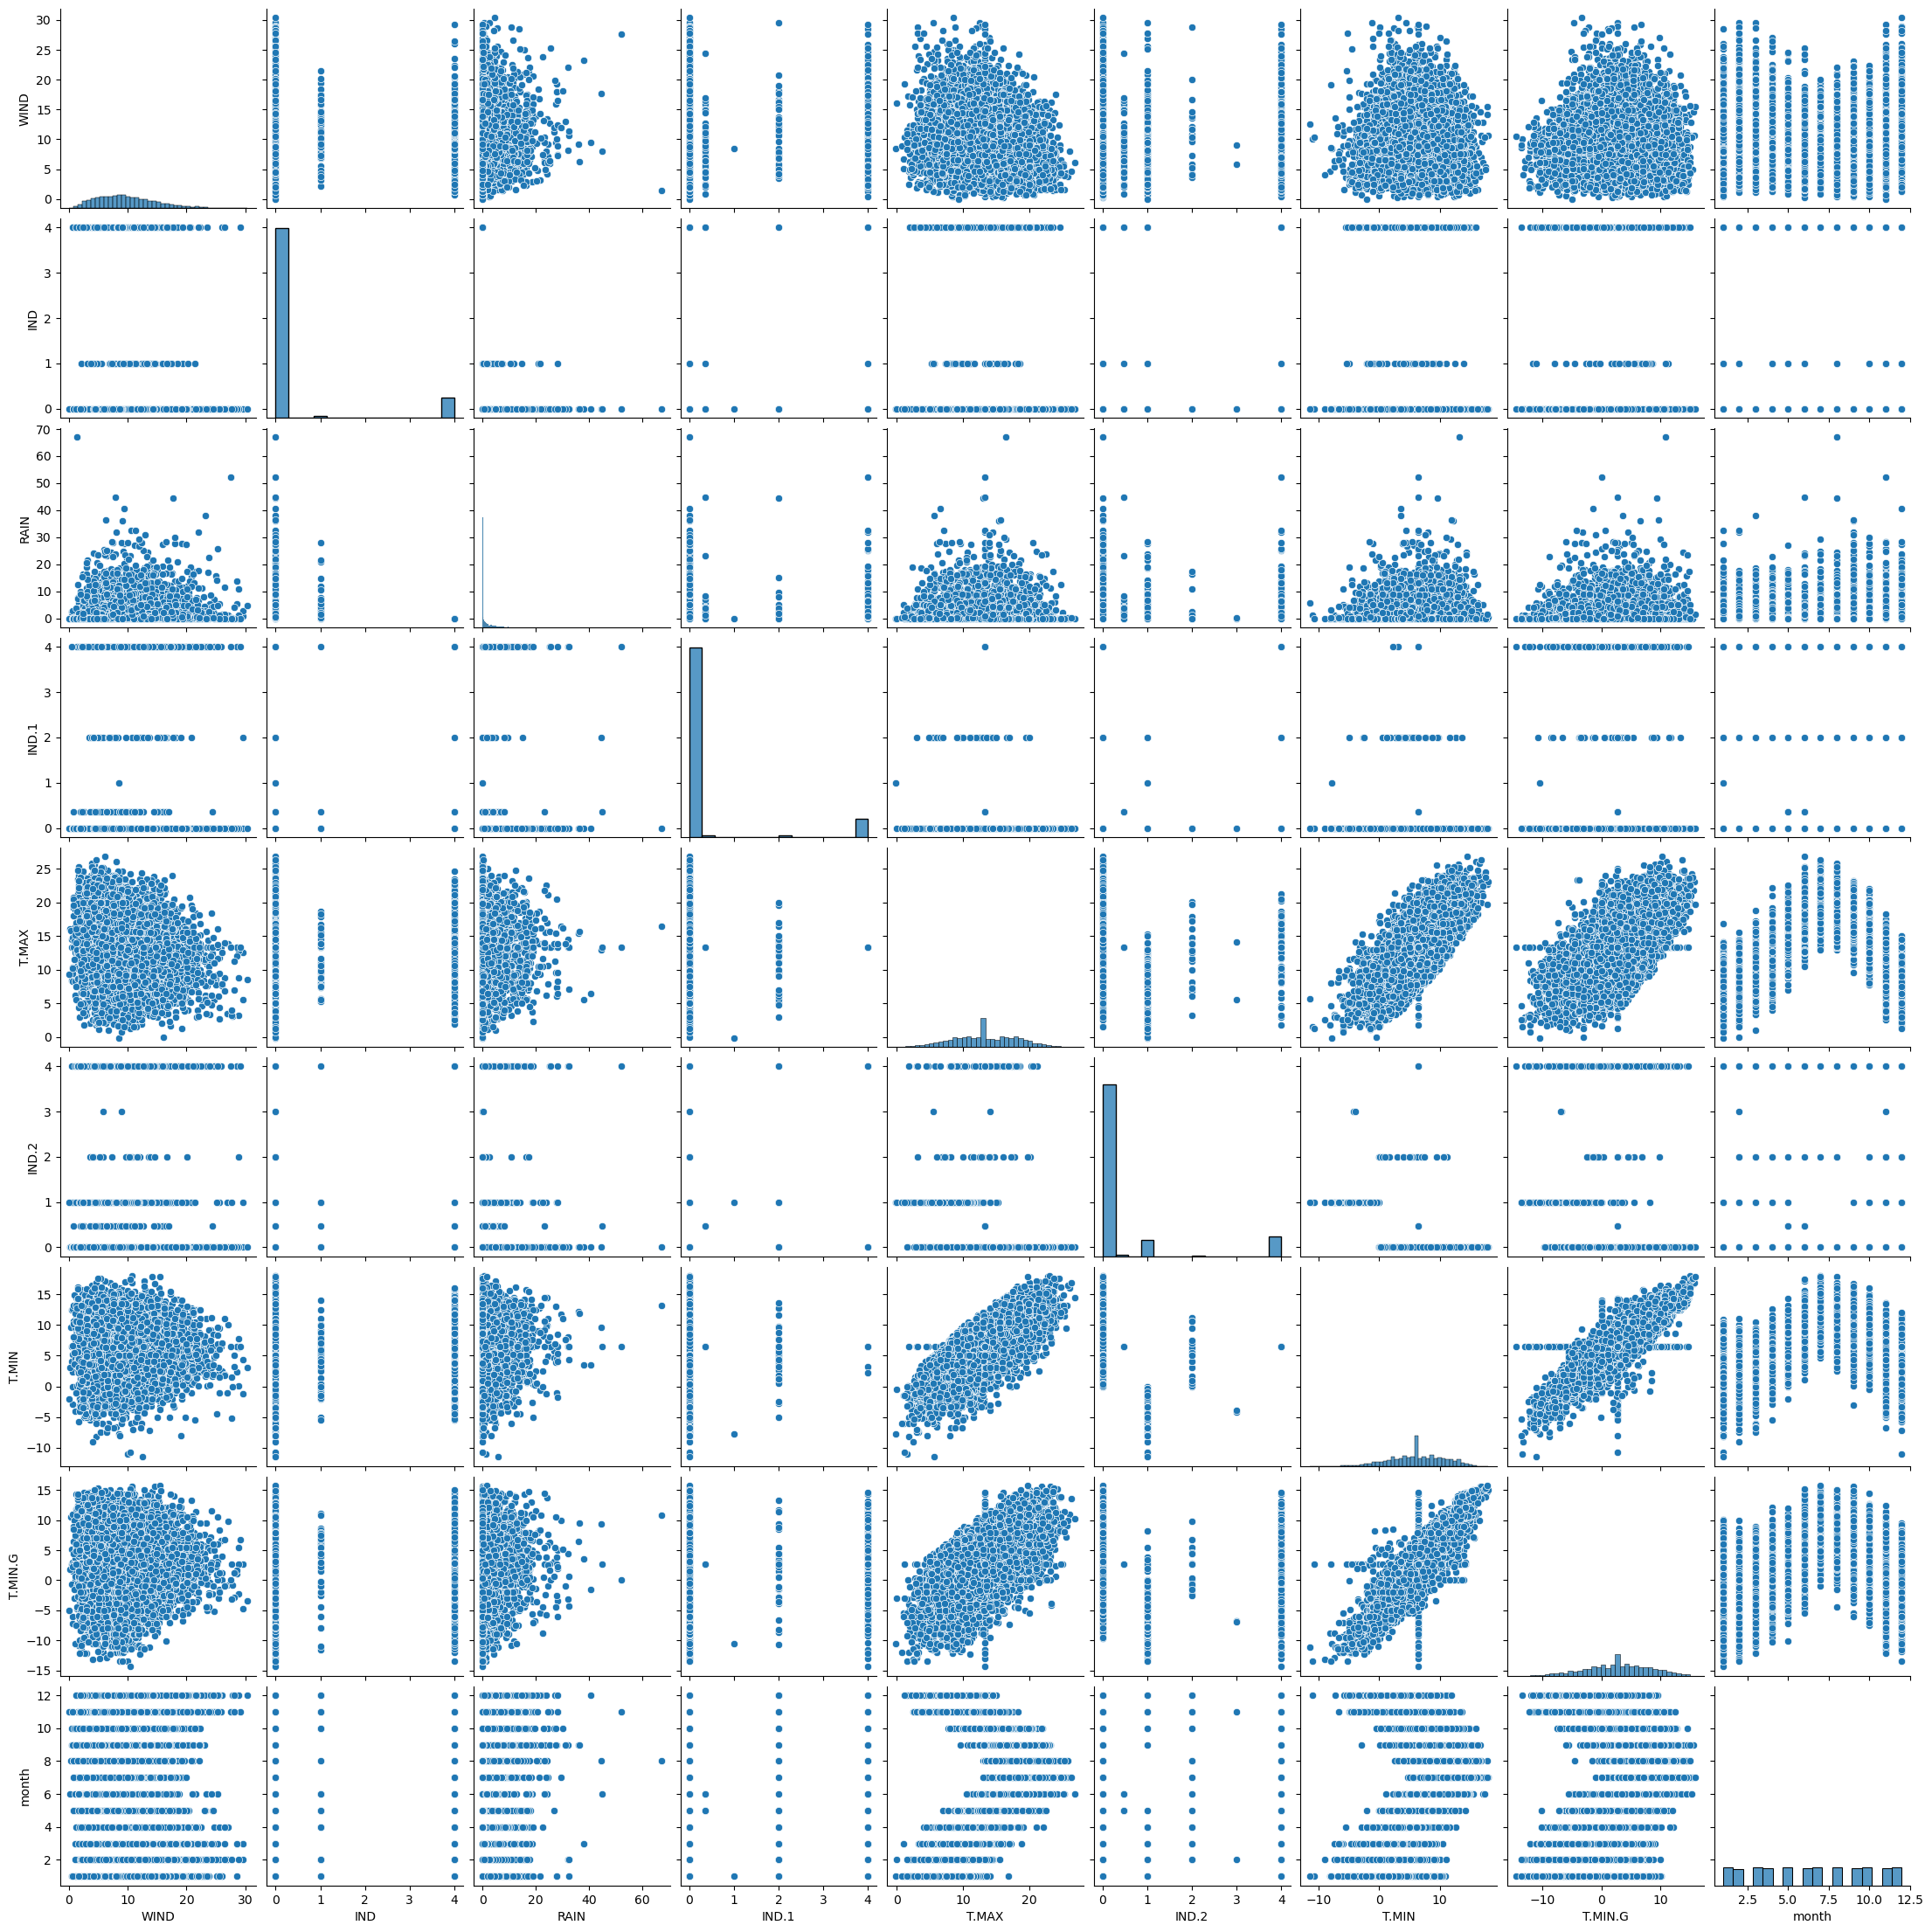

In [31]:
sns.pairplot(a)

this is the correlation between all data with each other